## 실습 1: aromawine 데이터로 히트맵 그린 후 vif 구하기
#### 종속변수는 Aroma, 나머지 변수들이 독립변수

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
wine = pd.read_excel('./data/wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mo      25 non-null     float64
 1   Ba      25 non-null     float64
 2   Cr      25 non-null     float64
 3   Sr      25 non-null     float64
 4   Pb      25 non-null     float64
 5   B       25 non-null     float64
 6   Mg      25 non-null     float64
 7   Ca      25 non-null     float64
 8   K       25 non-null     int64  
 9   Aroma   25 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.1 KB


In [4]:
wine.describe()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.159760,0.208080,0.043160,0.791880,0.734480,4.914000,125.756000,75.516000,1104.360000,5.036000
std,0.107598,0.107533,0.021916,0.489982,0.473532,1.660417,34.019028,18.464779,214.846821,1.106375
min,0.009000,0.071000,0.006000,0.156000,0.025000,2.570000,75.900000,44.900000,820.000000,3.300000
25%,0.074000,0.099000,0.028000,0.358000,0.518000,3.300000,103.000000,64.300000,976.000000,4.300000
50%,0.147000,0.181000,0.038000,0.927000,0.697000,4.910000,120.000000,74.700000,1090.000000,4.800000
75%,0.191000,0.301000,0.059000,1.120000,0.796000,6.420000,140.000000,84.600000,1170.000000,5.600000
max,0.479000,0.387000,0.100000,2.140000,2.060000,8.110000,199.000000,122.000000,1810.000000,7.700000


In [5]:
INPUT = wine.drop(columns=['Aroma'])
OUTPUT = wine['Aroma']

<AxesSubplot:>

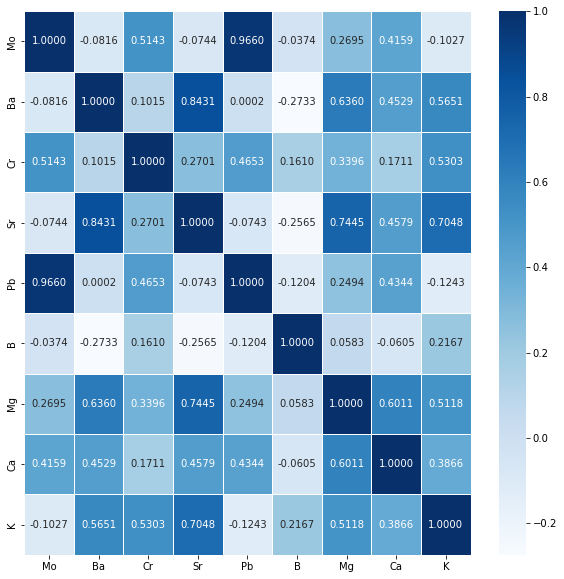

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data=INPUT.corr(), annot=True, fmt='.4f', linewidths=.5, cmap='Blues')

In [7]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(INPUT.values, i) for i in range(INPUT.shape[1])]
vif['features'] = INPUT.columns
vif

,VIF Factor,features
0,85.311791,Mo
1,28.700675,Ba
2,18.610717,Cr
3,40.164814,Sr
4,95.631351,Pb
5,27.587390,B
6,61.935836,Mg
7,52.573653,Ca
8,94.803892,K


## 실습 2: aromawine 데이터로 ridge 회귀 진행하고, mse 값과 R^2 구하기 (alpha값 0.001, 0.01, 0.1)

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
wine = pd.read_excel('./data/wine_aroma.xlsx')

INPUT = wine.drop(columns=['Aroma'])
OUTPUT = wine['Aroma']

In [10]:
alphas= [0.001, 0.01, 0.1]

for a in alphas:
    model = Ridge(alpha=a).fit(INPUT, OUTPUT)
    y_pred = model.predict(INPUT)
    mse = mean_squared_error(OUTPUT, y_pred)
    score = r2_score(OUTPUT, y_pred)
    print(f"Ridge regression => alpha: {a:.4f}, mse: {mse:.8f}, R2_score: {score:.6f}")

Ridge regression => alpha: 0.0010, mse: 0.19628421, R2_score: 0.832964
Ridge regression => alpha: 0.0100, mse: 0.22110930, R2_score: 0.811839
Ridge regression => alpha: 0.1000, mse: 0.24513247, R2_score: 0.791395


## 실습 3: aromawine 데이터로 선형 회귀 모형 만들고 adjusted r^2 값 구하기

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
wine = pd.read_excel('./data/wine_aroma.xlsx')

INPUT = wine.drop(columns=['Aroma'])
OUTPUT = wine['Aroma']

In [13]:
model = LinearRegression().fit(INPUT, OUTPUT)
y_pred = model.predict(INPUT)
mse = mean_squared_error(OUTPUT, y_pred)
score = r2_score(OUTPUT, y_pred)
adj_score = 1 - (1 - score) * (len(OUTPUT)-1) / (len(OUTPUT) - INPUT.shape[1] - 1)
print(f"Linear Regression => mse: {mse:.6f}, R2_score: {score:.6f}, adjusted_R2: {adj_score:.6f}")

Linear Regression => mse: 0.193368, R2_score: 0.835446, adjusted_R2: 0.736714
